In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



## Load the data

In [91]:
data = pd.read_csv('pacific.csv')
data.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


## data wrangling

In [92]:
pre_columns = data[:]
pre_columns.drop(['ID','Name','Date','Time','Event','Status','Latitude','Longitude'],
                axis=1, inplace=True)
pre_columns.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [93]:
relevant_cols = pre_columns.columns
relevant_cols

Index(['Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE',
       'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE',
       'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE',
       'High Wind SW', 'High Wind NW'],
      dtype='object')

In [94]:
## split the data in training and testing
train, test = train_test_split(data, test_size=0.3, random_state=5)
train_X = train[relevant_cols]
train_Y = train['Status']

test_X = test[relevant_cols]
test_Y = test['Status']

In [95]:
train_X.shape

(18295, 14)

In [96]:
test_X.shape

(7842, 14)

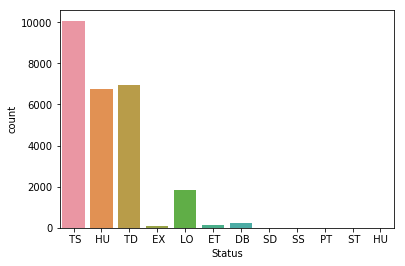

In [97]:
## lets understand the output
import seaborn as sns
sns.countplot(data['Status'])
plt.show()

In [98]:
# data["Status"] = pd.Categorical(data['Status'])
# data['Status'] = data.Status.cat.codes
# data.head()

In [99]:
# sns.countplot(data['Status'])
# plt.show()

In [100]:
# use the Model
gnb = GaussianNB()

# train the model
gnb.fit(train_X, train_Y)

# prediction
predicted_gnb = gnb.predict(test_X)

# testing the predicted values
accuracy_score(test_Y, predicted_gnb)


0.3136954858454476

## Confusion Matrix
- Refer the Notes.doc file to understand Confusion matrix

In [101]:
cnf_matrix = confusion_matrix(test_Y, predicted_gnb)
cnf_matrix

array([[  69,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0],
       [   0,   40,    0,    0,    0,    0,    0,    0,    0,    0,    2],
       [   5,   15,    0,    0,    2,    0,    1,    1,    0,   11,    0],
       [   0, 1125,    0,  901,    0,    0,    0,    0,   43,    0,    0],
       [ 477,    3,    2,    0,    0,    2,   18,    7,    0,   30,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    2,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [ 269, 1085,    0,    0,    0,    1,   68,    0,    0,  644,    0],
       [   0, 1591,    0,    1,    6,   65,    0,  551,    0,    0,  803]])

In [104]:
# sns.heatmap(cnf_matrix.T,
#             fmt='d',
#             annot=True,
#            xticklabels=relevant_cols,
#            yticklabels=relevant_cols)
# plt.show()

In [103]:
# confusion matrix Cats, Dogs and Rabbits
# assume you have 27 animals : 8 cats , 6 dogs and 13 Rabbits

# NOTE: Refer the Notes.doc file to understand Confusion matrix


